In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [4]:
IMAGE_SIZE = [224, 224]

train_path = 'data/train'
valid_path = 'data/test'


In [5]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

`Here we Initializing vgg16.[3] is because of rgb,use same weights used in imagenet competition,
include_top is false because we doesn't use inputs and dense and output layers.There are our custom I/P and O/P.`

In [6]:
# don't train existing weights because it's waste of time
for layer in vgg16.layers:
    layer.trainable = False     

In [7]:
folders = glob('data/train/*')       # all folders in train directory

In [8]:
folders

['data/train\\diseased cotton leaf',
 'data/train\\diseased cotton plant',
 'data/train\\fresh cotton leaf',
 'data/train\\fresh cotton plant']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)        # pretrained vgg16 weights

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')  # because multiple classes

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical') # because multiple classes

Found 18 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/4
61/61 [==============================] - 688s 11s/step - loss: 0.7043 - accuracy: 0.7335 - val_loss: 0.1598 - val_accuracy: 0.9444
Epoch 2/4
61/61 [==============================] - 685s 11s/step - loss: 0.2562 - accuracy: 0.9067 - val_loss: 0.3680 - val_accuracy: 0.8333
Epoch 3/4
61/61 [==============================] - 648s 11s/step - loss: 0.1776 - accuracy: 0.9298 - val_loss: 0.2918 - val_accuracy: 0.9444
Epoch 4/4
61/61 [==============================] - 753s 12s/step - loss: 0.1356 - accuracy: 0.9564 - val_loss: 0.1341 - val_accuracy: 0.9444


In [22]:
r.history

{'loss': [0.7042781114578247,
  0.2561774253845215,
  0.17763178050518036,
  0.1356193721294403],
 'accuracy': [0.7334700226783752,
  0.9067144989967346,
  0.929779589176178,
  0.956432580947876],
 'val_loss': [0.1598227620124817,
  0.3679855465888977,
  0.2917693555355072,
  0.1341417133808136],
 'val_accuracy': [0.9444444179534912,
  0.8333333134651184,
  0.9444444179534912,
  0.9444444179534912]}

In [24]:
model.save('cotton_disease_model.h5')

### `Single Image Prediction`

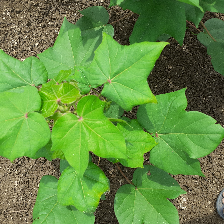

In [114]:
test_image1 =  image.load_img('test/diseased cotton plant/dd (328).jpg', target_size = (224,224))

test_image1

In [116]:
test_image1 = image.img_to_array(test_image1)

test_image1 = test_image1/255

test_image1 = np.expand_dims(test_image1,axis=0)

In [117]:
test_image1.shape

(1, 224, 224, 3)

In [118]:
# reshape data for the model
#test_image = test_image.reshape((1, test_image.shape[1], test_image.shape[2], test_image.shape[3]))

`If you get any error regarding to shape use above code..else move on to prediction.`

In [119]:
result = model.predict(test_image1)

In [120]:
result

array([[1.3153632e-04, 9.9598479e-01, 1.2042861e-03, 2.6794374e-03]],
      dtype=float32)

In [121]:
import os

In [122]:
di = "."

ground_truth_classes = os.listdir(di + '/test')

ground_truth_classes

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [124]:
print(f"Finally Predicted Plant is :   {ground_truth_classes[np.argmax(result)]} ")

Finally Predicted Plant is :   diseased cotton plant 
